In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

1. negative(I, t, ptOut): Given an image I as input, the method will show and save in memory the same image 
containing the negative operation (n(x,y) = 255 - I(x,y)) applied either in even columns (if t = 0) or in odd columns 
(if t = 1). 

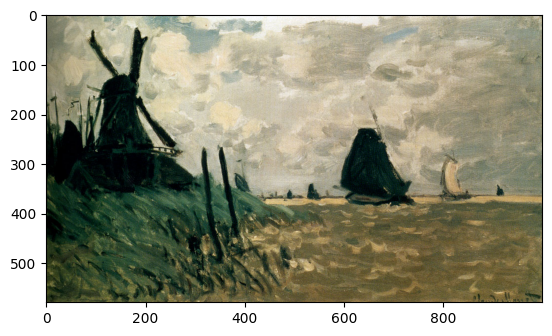

In [60]:
I = cv2.imread(r"C:\Users\andre\Pictures\211712.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.axis('on')  # Nascondi gli assi
plt.show()


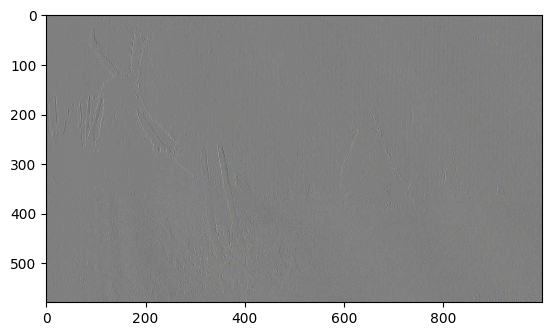

In [92]:
def negative(I, t, ptOut):
    ptOut= I.copy()
    if t%2==0:
        ptOut[:,::2,:]=255-I[:,::2,:]
    else:
        ptOut[:,1::2,:]=255-I[:,1::2,:]
    return plt.imshow(ptOut)

negative(I, 10, 10)




morph(I, ptOut): Apply, show and save to image I sequentially and step by step the morphological operators of 
opening (Erosion + Dilatation) and closing (Dilatation + Erosion): 

In [93]:
I = cv2.imread(r"C:\Users\andre\Pictures\211712.jpg")


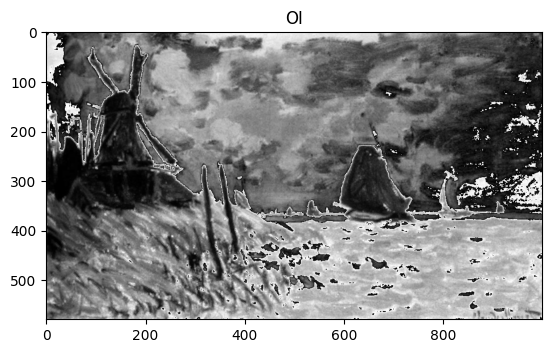

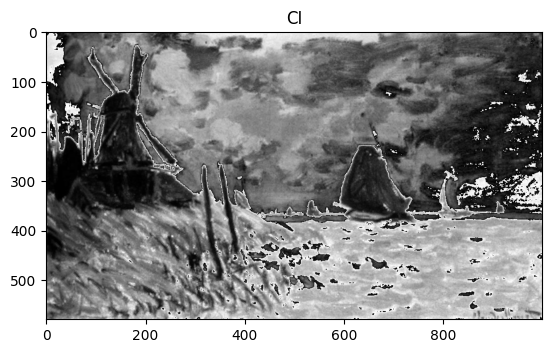

In [106]:
import cv2
import numpy as np

I = cv2.imread(r"C:\Users\andre\Pictures\211712.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

def morph(I):
    kernel = np.ones((3, 3), np.uint8)
    DI = cv2.dilate(I, kernel, iterations=1)
    EI = cv2.erode(I, kernel, iterations=1)
    OI= EI+DI
    cv2.imwrite('OI.jpg', OI)
    CI= DI+EI
    cv2.imwrite('CI.jpg', OI)

    plt.figure()
    plt.imshow(OI, cmap='gray')
    plt.title("OI")
    plt.figure()
    plt.imshow(CI, cmap='gray')
    plt.title("CI")
    plt.show()


morph(I)


Random-blocks(I): Divide the image into 4 blocks (b1, b2, b3, b4) of the same size and calculate: 
a. on block b1 the mathematical morphology (with respect to some selected by the student) 
b. on block b2 the interpolation (student's choice) 
c. 
on block b3 the Negative  
d. on block b4 any operation chosen by the student 
Reconstruct, show and save the final image obtained from the concatenation of the different outputs (see 
figure).  

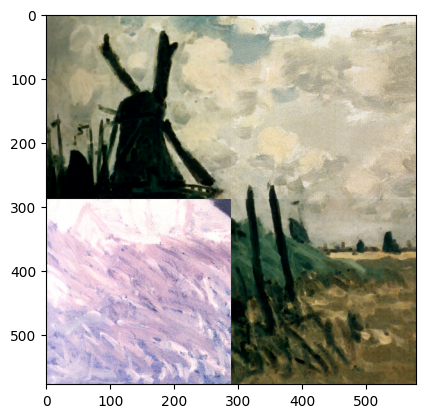

In [189]:
I = cv2.imread(r"C:\Users\andre\Pictures\211712.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
def Random_blocks(I):
    l= min(I.shape[0:2])
    if l%2==0:
        l=l
    else:
        l=l-1

    I= I[:l,:l,:]

    b1= I[:l//2,:l//2,:]
    b2= I[:l//2,l//2:l,:]
    b3= I[l//2:l,:l//2,:]
    b4= I[l//2:l,l//2:l,:]
    kernel = np.ones((3, 3), np.uint8)
    morp=[cv2.dilate,cv2.erode]
    b1 = morp[np.random.randint(0,2)](b1, kernel, iterations=1)
    b2=cv2.resize(b2, (l//2, l//2), interpolation=cv2.INTER_LINEAR)
    b3=255-b3
    b4= cv2.erode(b4, kernel, iterations=1)

    I2=I.copy()
    I2[:l//2,:l//2,:]=b1
    I2[:l//2,l//2:l,:]=b2
    I2[l//2:l,:l//2,:]=b3
    I2[l//2:l,l//2:l,:]=b4

    plt.imshow(I2)
    #cv2.imwrite('I2.jpg', I2)  # Replace with your desired file name and extension



Random_blocks(I)



